In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv("Resume.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.sample(10)

,Category,Resume
608,DevOps Engineer,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...
655,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...
603,DevOps Engineer,Core skills â¢ Project / Program Management â...
887,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...
837,DotNet Developer,TECHNICAL SKILLS â Programming Languages: C#...
784,ETL Developer,Technical Summary â¢ Knowledge of Informatica...
151,Web Designing,Education Details \r\n B.C.A Bachelor Computer...
718,Database,Education Details \r\nMay 2011 to May 2014 Bac...
192,Mechanical Engineer,Education Details \r\nJanuary 2018 Bachelor's ...
168,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...


In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
df.shape

(962, 2)

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

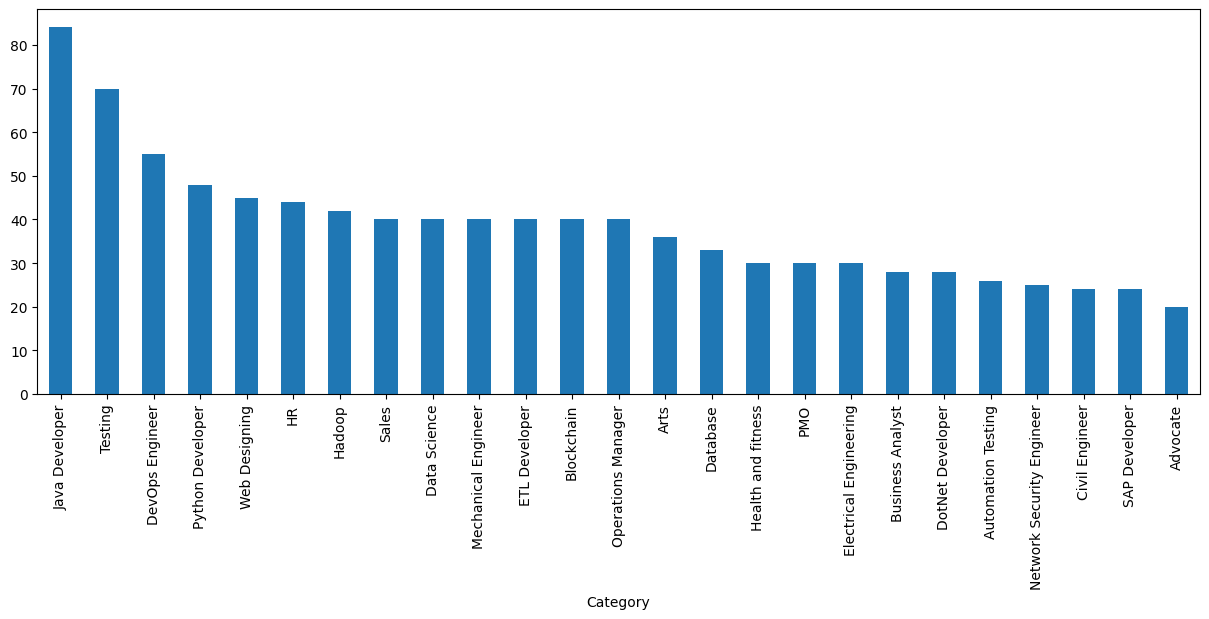

In [9]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

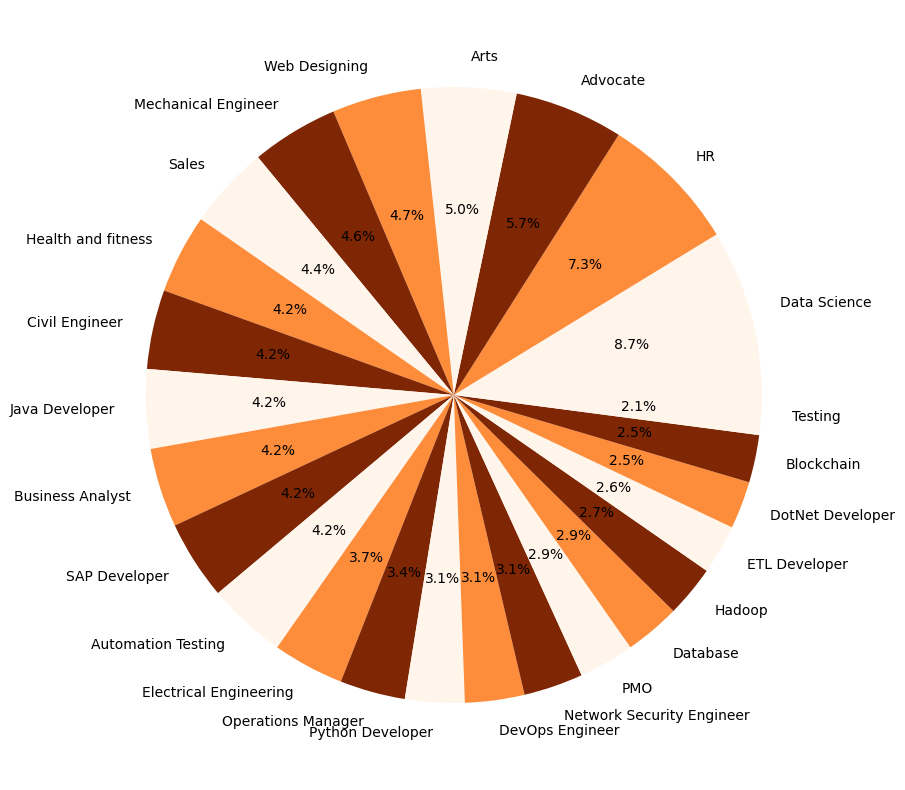

In [10]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [11]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text
    

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Vivek\AppData\Local\Temp\ipykernel_13544\877866067.py:7: SyntaxWarning: invalid escape sequence '\w'
  clean_text = re.sub('[^\w\s]', '', clean_text)


In [12]:
s = 'Hello, $%& I found this # article at https://www.vivek.com ! You can contact me at chando@example.com'

In [14]:
clean(s)

'Hello found article contact'

In [15]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [16]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [17]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [20]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [25]:
y_res.value_counts()

Category
2     69
3     69
18    69
14    69
1     69
12    69
13    69
22    69
11    69
23    69
15    69
19    69
6     69
0     69
8     69
9     69
16    69
4     69
20    69
7     69
5     69
21    69
10    69
17    69
24    69
Name: count, dtype: int64

In [27]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier())
}

In [29]:
# Dictionary to store metrics for each model
metrics_scores = {}

for model_name, model in models.items():
    model.fit(X_res, y_res)
    
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Using 'weighted' for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics_scores[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
print("\nSummary of Metrics for All Models:")
for model_name, scores in metrics_scores.items():
    print(f"\n{model_name}:")
    for metric, score in scores.items():
        print(f"  {metric}: {score:.4f}")



Summary of Metrics for All Models:

KNeighborsClassifier:
  Accuracy: 0.9948
  Precision: 0.9955
  Recall: 0.9948
  F1-Score: 0.9949

LogisticRegression:
  Accuracy: 0.9948
  Precision: 0.9959
  Recall: 0.9948
  F1-Score: 0.9950

RandomForestClassifier:
  Accuracy: 0.9948
  Precision: 0.9959
  Recall: 0.9948
  F1-Score: 0.9950

SVC:
  Accuracy: 0.9948
  Precision: 0.9951
  Recall: 0.9948
  F1-Score: 0.9948

MultinomialNB:
  Accuracy: 0.9948
  Precision: 0.9955
  Recall: 0.9948
  F1-Score: 0.9949

OneVsRestClassifier:
  Accuracy: 0.9948
  Precision: 0.9955
  Recall: 0.9948
  F1-Score: 0.9949


In [33]:
from sklearn.model_selection import KFold, cross_validate

# Define models for evaluation
models = [
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SVC', SVC()),
    ('MultinomialNB', MultinomialNB()),
    ('OneVsRest (LogReg)', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
]

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables for best model tracking
best_model = None
best_score = 0

# Perform K-Fold cross-validation for each model
for name, model in models:
    cv_results = cross_validate(
        model, X_res, y_res, cv=kf, 
        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    )
    
    # Calculate mean scores
    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_precision = cv_results['test_precision_macro'].mean()
    mean_recall = cv_results['test_recall_macro'].mean()
    mean_f1 = cv_results['test_f1_macro'].mean()
    
    # Print results for the current model
    print(f"\n{name}:")
    print(f"Accuracy: {mean_accuracy:.4f}, Precision: {mean_precision:.4f}, Recall: {mean_recall:.4f}, F1-Score: {mean_f1:.4f}")
    
 



KNN:
Accuracy: 0.9942, Precision: 0.9949, Recall: 0.9942, F1-Score: 0.9941

Logistic Regression:
Accuracy: 0.9977, Precision: 0.9980, Recall: 0.9974, F1-Score: 0.9975

Random Forest:
Accuracy: 0.9988, Precision: 0.9989, Recall: 0.9988, F1-Score: 0.9988

SVC:
Accuracy: 0.9988, Precision: 0.9990, Recall: 0.9988, F1-Score: 0.9989

MultinomialNB:
Accuracy: 0.9977, Precision: 0.9981, Recall: 0.9974, F1-Score: 0.9976

OneVsRest (LogReg):
Accuracy: 0.9971, Precision: 0.9974, Recall: 0.9969, F1-Score: 0.9970


In [34]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

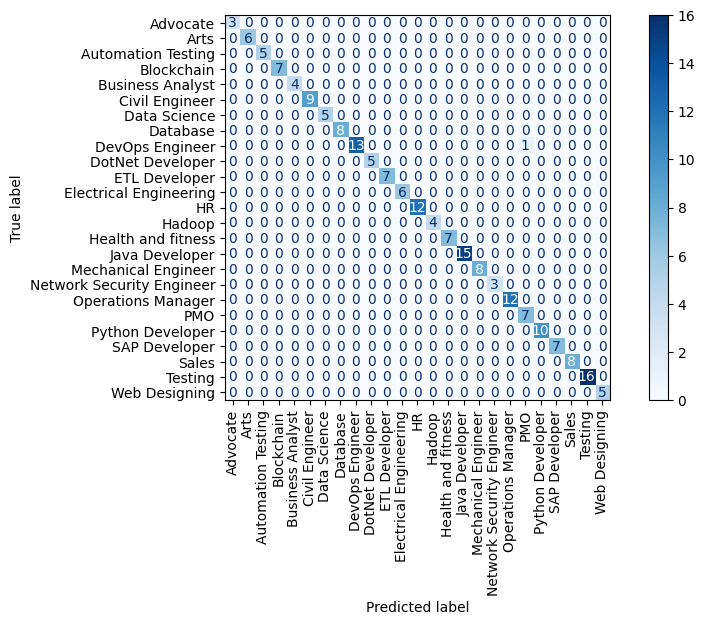

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = [
    "Advocate", "Arts", "Automation Testing", "Blockchain", "Business Analyst",
    "Civil Engineer", "Data Science", "Database", "DevOps Engineer", "DotNet Developer",
    "ETL Developer", "Electrical Engineering", "HR", "Hadoop", "Health and fitness",
    "Java Developer", "Mechanical Engineer", "Network Security Engineer", "Operations Manager",
    "PMO", "Python Developer", "SAP Developer", "Sales", "Testing", "Web Designing"
]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,5))  
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.show()
